In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('BlackFriday (1).csv')

In [8]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


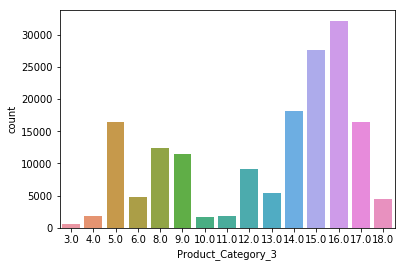

In [9]:
sns.countplot(data.Product_Category_3)

# Data Wrangling

In [10]:
##b = ['Product_Category_2','Product_Category_3']
#for i in b:
    #exec("data.%s.fillna(data.%s.value_counts().idxmax(), inplace=True)" %(i,i))
data=data.fillna(0)

In [11]:
#Getting dummies for the categorical values
data['Gender']=pd.get_dummies(data['Gender'])
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['City_Category']=LE.fit_transform(data['City_Category'])

# Data Analysis

In [12]:
#total number of customers who purchased on black friday
Total_Cust=len(set(data.User_ID))
#total purchase taken place
Total_purchase=len(data.User_ID)
Duplicates=Total_purchase-Total_Cust

In [13]:
print(Duplicates)
count=data.groupby(['User_ID'])['User_ID'].count()

531686


Text(0.5, 1.0, 'Top 10 Customers')

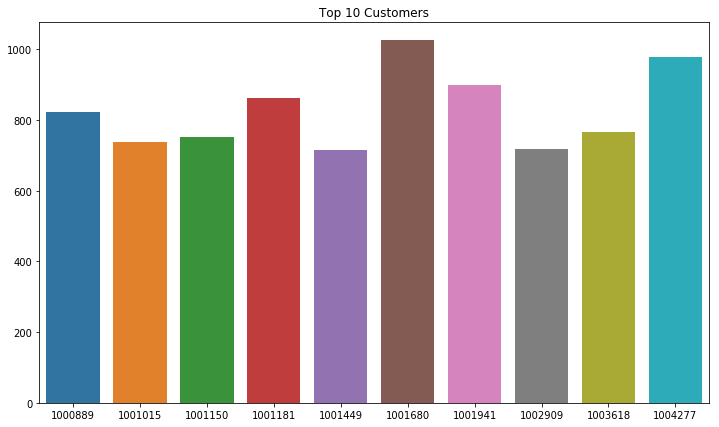

In [14]:
#to to see the maximum number of purchase made by a single user
Top_Customers=data['User_ID'].value_counts().sort_values(ascending=False).head(10)
Top_Customers
X1=['1001680',
'1004277',
'1001941',
'1001181',
'1000889',
'1003618',
'1001150',
'1001015',
'1002909',
'1001449'
]
Y1=[1025,978,898,861,822,766,752,739,717,714]
plt.figure(figsize=(12,7))
sns.barplot(X1,Y1).set_title('Top 10 Customers')
#Customer with ID 1001680 has made the highest number of purchase

In [15]:
#Total number of products bought
len(set(data.Product_ID))
max(data.groupby(['Product_ID'])['Product_ID'].count())

1858

Text(0.5, 1.0, 'Top 10 Products')

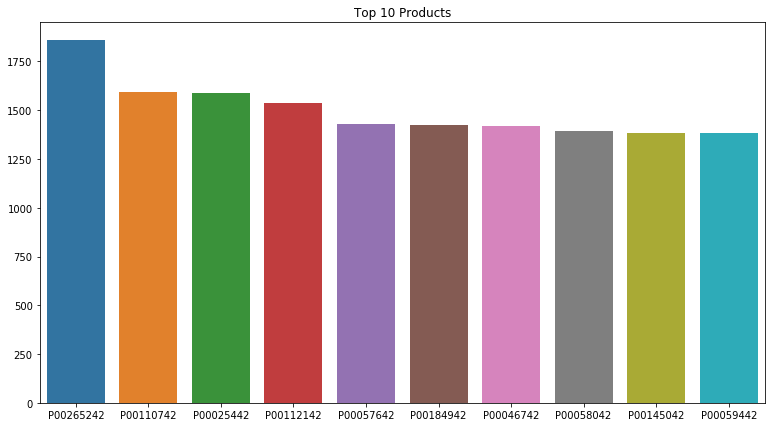

In [16]:
Top_Product=data['Product_ID'].value_counts().sort_values(ascending=False).head(10)
Top_Product
X=['P00265242',    
'P00110742',    
'P00025442',   
'P00112142',    
'P00057642',    
'P00184942',   
'P00046742',    
'P00058042',    
'P00145042',   
'P00059442']
Y=[1858,1591,1586,1539,1430,1424,1417,1396,1384,1384]
#Product with ID P00265242 has been bought the most
plt.figure(figsize=(13,7))
sns.barplot(X,Y).set_title('Top 10 Products')

Text(0.5, 1.0, 'Purchase amount Distribution')

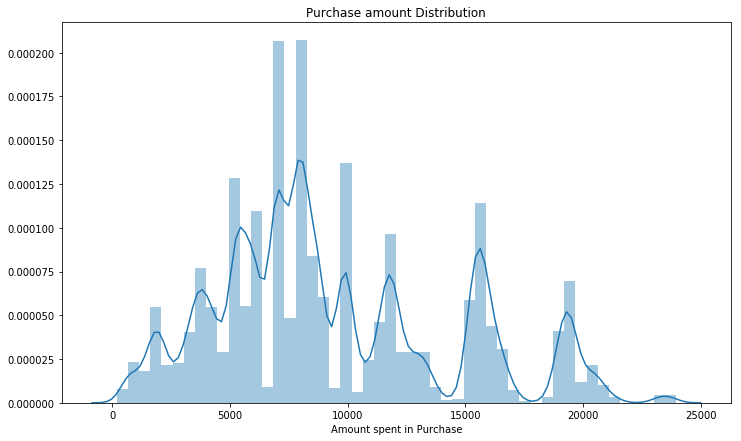

In [17]:
#Distribution of target variable(Purchase)

plt.figure(figsize=(12,7))
#plt.hist(data.Purchase,bins=25)
sns.distplot(data.Purchase)
plt.xlabel('Amount spent in Purchase')
plt.title('Purchase amount Distribution')

In [18]:
Skew=data.Purchase.skew()
Kurt=data.Purchase.kurt()
print(Skew)  #positive proves that the target variable is right skewed
print(Kurt) #negative this means that there are less number of outliers

0.6242797316083074
-0.34312137256836284


### Checking which numerical feature has greater impact on purchase using correlation matrix

In [19]:
#corr=data.select_dtypes('int')
#corr=data.select_dtypes('float')

In [20]:
import numpy as np
num_features=data.select_dtypes(include=np.number)
corr=num_features.corr()

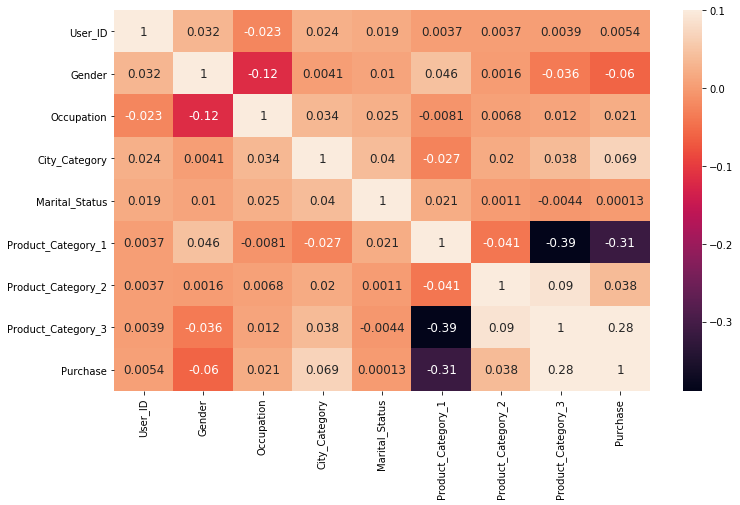

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,vmax=0.1,annot_kws={'size': 12}, annot=True)

### Analysing the relationship of the variables that have highest correlation with the target variable

#### Average user puchase based on occupation

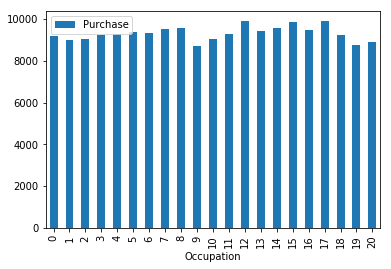

In [22]:
Occ_AvgPurchase=num_features.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean).plot(kind='bar')


In [23]:
num_features.pivot_table(index='Occupation',values='Purchase').max()

Purchase    9906.378997
dtype: float64

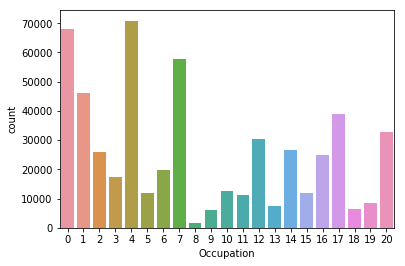

In [24]:
OCC_plot=sns.countplot('Occupation',data=data)

When we see the occupation that has made most purchase we can see that people in
occupation 0,4,7 have made highest purchase whereas in Occ_AvgPurchase we see that people in 
occupation 12,15,17 have made the highest average purchase.

### Determining user total sum of purchase for each user_ID based on Product_category_1 

In [25]:
user_purchase=pd.pivot_table(num_features[['User_ID','Product_Category_1','Purchase']],
                             index='User_ID',values='Purchase',columns='Product_Category_1',aggfunc=np.sum).fillna(0)

In [26]:
user_purchase['Tot_Purchase_perUser']=user_purchase.sum(axis=1)

In [27]:
a=user_purchase['Tot_Purchase_perUser'].sort_values(ascending=False).head(10)

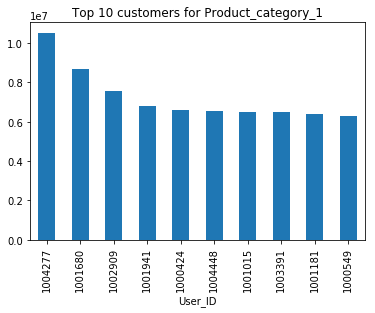

In [28]:
a.plot(kind='bar',title='Top 10 customers for Product_category_1')

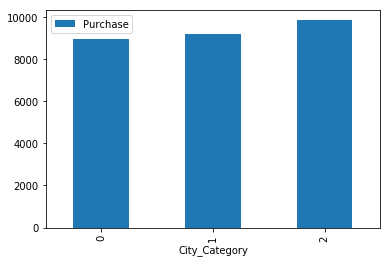

In [29]:
data.pivot_table(index='City_Category',values='Purchase',aggfunc=np.mean).plot(kind='bar')

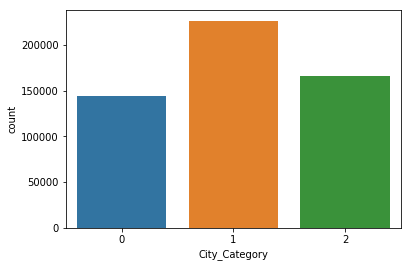

In [30]:
sns.countplot('City_Category',data=data)

#### Though we see that people from City B have made the highest number of purchase ,it is evident that the highest amount of purchase was made from city C

Similary we can see the average purchse made by each gender,each age group etc.

## Feature Engneering

In [31]:
data['Age']=LE.fit_transform(data['Age'])
data['Stay_In_Current_City_Years']=LE.fit_transform(data['Stay_In_Current_City_Years'])

In [32]:
data=data.drop(['Product_ID'],axis=1)
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']

### Feature Selection using Variance Threshold

In [33]:
from sklearn.feature_selection import VarianceThreshold

In [34]:
Var=VarianceThreshold(threshold=0.8)
Neglected_features=Var.fit_transform(X)

In [35]:
X.columns[Var.get_support()] #selected features

Index(['User_ID', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [36]:
neglected_features=[i for i in X.columns if i not in X.columns[Var.get_support()]]
neglected_features

['Gender', 'City_Category', 'Marital_Status']

Gender and Marital status have boolean values 1 or 0 and City_Category is 0,1 or 2 which means there is not much variance and hence those variables 
are removed 

In [37]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

### Feature selection using RFE

In [38]:
model=LinearRegression()
rfe=RFE(model,5)
X_rfe=rfe.fit_transform(X,y)
X.columns[rfe.get_support()]

Index(['Gender', 'Age', 'City_Category', 'Product_Category_1',
       'Product_Category_3'],
      dtype='object')

In [39]:
rfe.ranking_

array([6, 1, 1, 5, 1, 3, 2, 1, 4, 1])

### Dropping features having lowest value of coefficients using Linear regression model

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
X_selected=Var.transform(X_train)
X_test_selected=Var.transform(X_test)

In [42]:
model.fit(X_selected,y_train).score(X_test_selected,y_test)

0.12855708783641318

In [43]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest,chi2

In [44]:
data1=data

In [45]:
X1=data1.drop(['Purchase'],axis=1)
y1=data1['Purchase']

In [46]:
model.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
predict1=model.predict(X1)
r2_score(y1,predict1)

0.1353540281988299

In [48]:
mean_absolute_error(y1,predict1)

3546.6465354853294

In [49]:
mean_squared_error(y1,predict1)

21452329.43425833

In [50]:
print('Intercept parameter:', model.intercept_)
coeff_df = pd.DataFrame(model.coef_, X1.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: -4738.656258598683
                            Coefficient
User_ID                        0.014548
Gender                      -485.619495
Age                          103.834955
Occupation                     5.938674
City_Category                335.583952
Stay_In_Current_City_Years     9.270895
Marital_Status               -48.893169
Product_Category_1          -317.854336
Product_Category_2             8.205300
Product_Category_3           148.414817


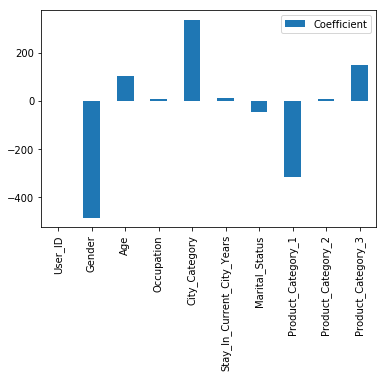

In [51]:
coeff_df.plot(kind='bar')

## Regression Models

### Ridge regression

In [52]:
New_data=data.drop(['User_ID','Product_Category_2','Marital_Status','Occupation'],axis=1)

In [53]:
X2=New_data.drop(['Purchase'],axis=1)
Y2=New_data['Purchase']

In [54]:
from sklearn.linear_model import Ridge
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,Y2,test_size=0.3,random_state=0)
RR = Ridge(alpha=0.05,normalize=True)
RR.fit(X_train2,y_train2)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [55]:
prediction=RR.predict(X_test2)

In [71]:
print(r2_score(y_test2,prediction))
y_predict=RR.predict(X_test2)
print("RMSE "+str(np.sqrt(mean_squared_error(y_predict,y_test2))))

0.1325429368664639
RMSE 4638.488200154108


There is no much change in accuracy because ,ridge regression is a regularisation that deals with 
multicollinearity problems in the dataset.Since our dataset does not have predictor variables that are multicollinear
there is not much difference in the accuracy.

In [57]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit_transform(X2)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.75113795, -1.84443901, -1.36984069,  0.1089617 , -0.6120319 ,
        -0.617906  ],
       [ 1.75113795, -1.84443901, -1.36984069,  0.1089617 , -1.14526606,
         1.61638936],
       [ 1.75113795, -1.84443901, -1.36984069,  0.1089617 ,  1.78752181,
        -0.617906  ],
       ...,
       [-0.57105724,  0.37354097,  1.26303237, -0.66633615,  0.72105349,
        -0.617906  ],
       [-0.57105724,  0.37354097,  1.26303237, -0.66633615, -0.07879774,
        -0.617906  ],
       [-0.57105724,  0.37354097,  1.26303237, -0.66633615, -0.07879774,
        -0.617906  ]])

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
#std=StandardScaler()
#X_train2=std.fit_transform(X_train2)
#X_test2=std.fit_transform(X_test2)

dtr=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
import numpy as np
from sklearn.metrics import mean_squared_error

### Decision tree regressor

In [65]:
print("R2 score before feature selection "+str(dtr.fit(X_train,y_train).score(X_test,y_test)*100))
print("R2 score after feature selection "+str(dtr.fit(X_train2,y_train2).score(X_test2,y_test2)*100))
y_predict=dtr.predict(X_test2)
print("RMSE "+str(np.sqrt(mean_squared_error(y_predict,y_test2))))

R2 score before feature selection 50.56268998045812
R2 score after feature selection 63.32768114181254
RMSE 3015.9327159112177


### Random forest regressor

In [66]:
print("R2 score before feature selection "+str(rf.fit(X_train,y_train).score(X_test,y_test)*100))
print("R2 score after feature selection "+str(rf.fit(X_train2,y_train2).score(X_test2,y_test2)*100))
y_predict=rf.predict(X_test2)
print("RMSE "+str(np.sqrt(mean_squared_error(y_predict,y_test2))))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2 score before feature selection 62.424271952334806
R2 score after feature selection 63.56536158957509
RMSE 3006.1434045753667


### Gradient boost regressor

In [155]:
print("R2 score before feature selection "+str(gbr.fit(X_train,y_train).score(X_test,y_test)*100))
print("R2 score after feature selection "+str(gbr.fit(X_train2,y_train2).score(X_test2,y_test2)*100))

R2 score before feature selection 64.31843219063023
R2 score after feature selection 63.95206989339472


### Polynomial Regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2) #degree 2

In [78]:
X_transform=poly.fit_transform(X_train2)
X_test_transform=poly.fit_transform(X_test2)
print(model.fit(X_train2,y_train2).score(X_test2,y_test2))
print(model.fit(X_transform,y_train2).score(X_test_transform,y_test2)) #polynomial regression fits better
y_predict=model.predict(X_test_transform)
print("RMSE "+str(np.sqrt(mean_squared_error(y_predict,y_test2))))

0.13256806066980087
0.25539413038095404
RMSE 4297.498067318087


In [83]:
poly_grid.best_score_

0.28698133673794296

## Hyperparameter tuning

In [76]:
from sklearn.metrics import SCORERS

In [77]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

### Random Forest with RandomizedSearchCV

In [78]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Creating a random grid for tuning with different measures.We are trying to look for the best combinations of features 
by selecting them randomly.

In [80]:
n_estimators=[int(x) for x in np.linspace(10,20,4)]
bootstrap =[True,False]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(20,40,6)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]

random_grid={'n_estimators':n_estimators,
            'bootstrap':bootstrap,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [10, 13, 16, 20], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 24, 28, 32, 36, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [81]:
random_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2)
random_cv.fit(X_train2,y_train2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=16, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=32, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=16, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=32, bootstrap=True, total=   5.6s
[CV] n_estimators=16, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=32, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=16, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=32, bootstrap=True, total=   5.1s
[CV] n_estimators=16, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=32, bootstrap=True 
[CV]  n_estimators=16, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=32, bootstrap=True, total=   5.9s
[CV] n_estimators=16, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=16, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   3.4s
[CV] n_estimators=16, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=16, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   3.1s
[CV] n_estimators=16, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=16, min_samples_spli

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 13, 16, 20], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 24, 28, 32, 36, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [82]:
random_cv.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [83]:
rf.fit(X_train2,y_train2).score(X_test2,y_test2)*100

63.519570810359326

In [86]:
rf_randomized=RandomForestRegressor(n_estimators=10,min_samples_split=5,min_samples_leaf=4,max_features='auto',
                                   max_depth=None,bootstrap=True)

In [99]:
print("before tuning "+str(rf.fit(X_train2,y_train2).score(X_test2,y_test2)*100))
print("after tuning "+str(rf_randomized.fit(X_train2,y_train2).score(X_test2,y_test2)*100))

before tuning 63.56052489683219
after tuning 64.04293416392193


### RandomForest regressor with GridSearch CV

In [123]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [10, 20, 30]
}

In [124]:
Grid_cv=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2)

In [ ]:
Grid_cv.fit(X_train2,y_train2)

In [238]:
rf.fit(X_train2,y_train2).score(X_test2,y_test2)*100

63.557055872580314

In [242]:
print(Grid_cv.best_params_)
#print(Grid_cv.best_score_)


{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 30}


In [96]:
Grid_cv_rf=RandomForestRegressor(n_estimators=30,max_depth=90,max_features=3,min_samples_leaf=4,min_samples_split=10,
                                bootstrap=True)

In [97]:
print("before tuning "+str(rf.fit(X_train2,y_train2).score(X_test2,y_test2)*100))
print("After tuning "+str(Grid_cv_rf.fit(X_train2,y_train2).score(X_test2,y_test2)*100))

before tuning 63.54957933293931
After tuning 64.15775896857936


### Parameter tuning for ridge regression with GridSearch CV

In [120]:
from sklearn import linear_model

In [63]:
RR.fit(X_train2,y_train2).score(X_test2,y_test2)

0.1325429368664639

In [64]:
Ridge=RR.fit(X_train2,y_train2)
pr=RR.predict(X_test2)
r2_score(y_test2,pr)

0.1325429368664639

In [65]:
RR.get_params()

{'alpha': 0.05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [66]:
alphas = np.array([1,0.1])
max_iter=[3,6,7]
normalise=[True,False]
solver=['auto']
random_state=[1,2,3,4]

In [70]:
grid_cv_RR=GridSearchCV(estimator=RR,
                     param_grid=dict(alpha=alphas,max_iter=max_iter,solver=solver,random_state=random_state))

In [71]:
grid_cv_RR.fit(X_train2,y_train2)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1. , 0.1]), 'max_iter': [3, 6, 7], 'solver': ['auto'], 'random_state': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
grid_cv_RR.best_params_

{'alpha': 0.1, 'max_iter': 3, 'random_state': 1, 'solver': 'auto'}

In [73]:
grid_cv_RR=linear_model.Ridge(alpha=0.1,max_iter=3,solver='auto',normalize=False,random_state=1)

In [74]:
grid_cv_RR.fit(X_train2,y_train2).score(X_test2,y_test2)

0.1325680605958286

### Parameter tuning in Polynomial regression

In [74]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': 
              [True, False], 'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=6, scoring='r2')

In [ ]:
print("Before tuning"+str(model.fit(X_transform,y_train2).score(X_test_transform,y_test2)))
print("After tuning"+str(poly_grid.fit(X_train2,y_train2).score(X_test2,y_test2)))

y_predict=poly_grid.predict(X_test_transform)
print("RMSE "+str(np.sqrt(mean_squared_error(y_predict,y_test2))))

#poly_grid.get_params()